# SpikeVision Test

In [ ]:
!pip install snntorch

fatal: destination path 'snntorch' already exists and is not an empty directory.


In [1]:
import snntorch as snn
from snntorch.spikevision import spikedata

ModuleNotFoundError: No module named 'snntorch'

## Downlaod Dataset

In [ ]:
# note that a default transform is already applied to keep things easy
train_ds = spikedata.SHD("dataset/shd", train=True)
test_ds = spikedata.SHD("dataset/shd", train=False)

The following files do not exist, will attempt download:
dataset/shd/shd_train.hdf5
dataset/shd/shd_test.hdf5


Extracting dataset/shd/shd_test.h5.gz to dataset/shd


Extracting dataset/shd/shd_train.h5.gz to dataset/shd
Creating shd.hdf5...
shd.hdf5 was created successfully.


In [ ]:
train_ds

Dataset SHD
    Number of datapoints: 8156
    Root location: dataset/shd/shd.hdf5
    StandardTransform
Transform: Compose(
               Downsample(dt = {0}, dp = {1}, dx = {2}, dy = {3})
               ToChannelHeightWidth()
               ToCountFrame(T=1000)
               ToTensor(device:cpu)
               hflip()
           )
Target transform: <function identity at 0x7fb8cf90d3b0>

## Create DataLoaders

In [ ]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, shuffle=True, batch_size=64)
test_dl = DataLoader(test_ds, shuffle=False, batch_size=64)

## Play with Data

In [ ]:
# get a feel for the data

test_dl.dataset[0][0].size()  #index into sample 0

torch.Size([1000, 700])

## Plot Data

torch.Size([1000, 700])


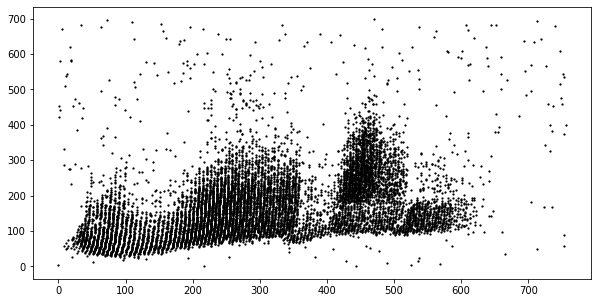

In [ ]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt

n = 2000

print(test_dl.dataset[n][0].size())

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)

splt.raster(test_dl.dataset[n][0], ax, s=1.5, c="black")